# Shifted-tilted Tophat at Gaussian interference at waist

The new tophat modes after applying first-order shift and tilt are (for a shift $x - a$)

\begin{equation}
	u_{n,m} =
     u_{n,m}
        \left[
        1 + \frac{2 a }{w(z)^2} x + i k \alpha x + i \frac{2 k \alpha a}{w(z)^2} x^2 
    \right]
    - 
	a \frac{2 \sqrt{n}}{w(z)} 
	u_{n-1,m}
	\left[
        1+ i k \alpha x
    \right]	 \; .
\end{equation}

The new tophat modes after applying first-order shift and tilt are (for a shift $x + a$, matching AW):
\begin{equation}
	 u_{n,m} =
     u_{n,m}
        \left[
        1 - \frac{2 a }{w(z)^2} x + i k \alpha x - i \frac{2 k \alpha a}{w(z)^2} x^2 
    \right]
    + 
	a \frac{2 \sqrt{n}}{w(z)} 
	u_{n-1,m}
	\left[
        1+ i k \alpha x
    \right]	 \; .
\end{equation}


In [1]:
import PauLisa as pl, numpy as np, matplotlib.pyplot as plt
from scipy.special import erfi as erfi
pi=np.pi

import scipy.io

In [2]:
mat = scipy.io.loadmat('Top_hat_for_paul.mat')
coef=mat['coeftop'].ravel()

Using simtools mode indexing in Python:

$
m = \frac{(N+1)(N+2)}{2}- (A_{python} + 1)
$

$
\rightarrow A_{python} =  \frac{(N+1)(N+2)}{2} + 1 -m 
$

$
n = A_{python} - \frac{N(N+1)}{2} = N-m
$

$
\rightarrow A_{python} = N-m + - \frac{N(N+1)}{2} 
$

$
N = floor( \frac{\sqrt{8A_{python}+1} - 1}{2} ) = ceil(\frac{\sqrt{9+8A_{python}} - 3}{2} )
$

In [3]:
def N_f(A):
    
    res = np.floor((np.sqrt(8*A+1)-1)/2)
    
    #res = (np.sqrt(9+8*A)-3)/2
    return(res)

def m(N,A):
    res = (N+1)*(N+2)/2 - (A+1)
    return(res)

#def n(N,A):
#    m= (N+1)*(N+2)/2 - (A+1)
#    res = N-m
#    return(res)
def n(N,A):
    res = A - (N*(N+1)/2)
    return(res)

NumberModes = int(len(coef))
listModesN = [None] * NumberModes
listModesM = [None] * NumberModes
listModesC = [None] * NumberModes



#for i in range(len(coef)):
#    A=i
#    N= N_f(A)
#
#    if (m(N,A)%2 == 0) & (n(N,A)%2 == 0):
#        print(coef[A], '\t\t\t' , m(N,A), ',' , n(N,A))

for i in range(NumberModes):
    A=i
    N= N_f(A)
    listModesN[i] = int(m(N,A))
    listModesM[i] = int(n(N,A))
    listModesC[i] = coef[i]
    
    

In [4]:
plane = pl.Plane(-2e-3, 2e-3, 200, -2e-3, 2e-3, 200)
params = pl.Params(1064e-9, 0.00023067,0)

modes = pl.create_modes(listModesM,listModesN,listModesC,NumberModes)
modes18= pl.create_modes_order18(listModesM,listModesN,listModesC,NumberModes)
print(params)
print(plane)



wavelength=1.064e-06
w0=0.00023067
z0=0
Zr=0.15710516963503632
q0=0.15710516963503632j

xmin=-0.002,xmax=0.002,xpoints=200,x step size = 2e-05
ymin=-0.002,ymax=0.002,ypoints=200,y step size = 2e-05


In [5]:
a = 100e-6
alpha = 0
z=0.00023067
print(type(a))

<class 'float'>


In [6]:
f = pl.calculate(params,plane,modes,z)
#f18 = pl.calculate_case2_no_scatter(params,plane,modes18,z,a,alpha)

U sum <class 'int'>


TypeError: 'tuple' object is not callable

NameError: name 'f' is not defined

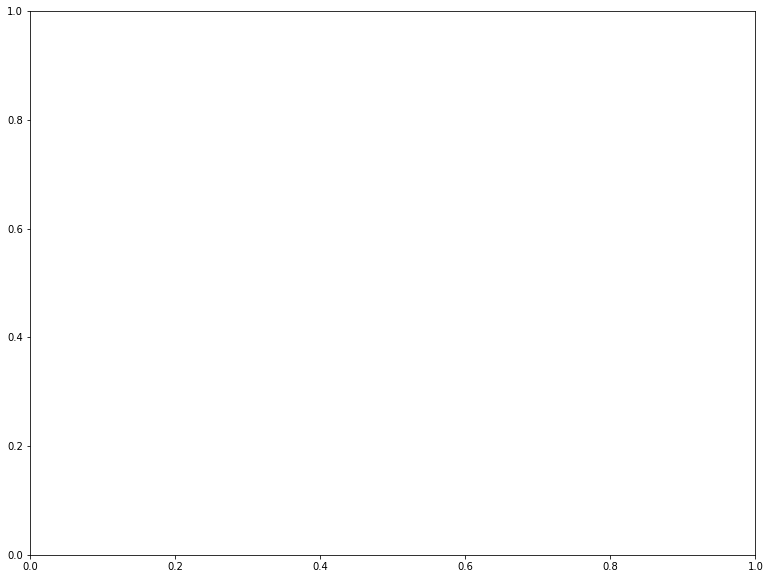

In [7]:
fig, ax = plt.subplots(figsize=(13, 10))
cs = plt.contourf(f.plane.getX(), f.plane.getY(), abs(f.getAmp() ** 2))
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
cbar = fig.colorbar(cs)
plt.title('Intensity')
ax.ticklabel_format(axis='x', style='sci', scilimits=(-3, -3), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, -3), useMathText=True)

In [ ]:
fig, ax = plt.subplots(figsize=(13, 10))
cs = plt.contourf(f18.plane.getX(), f18.plane.getY(), abs(f18.getAmp() ** 2))
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
cbar = fig.colorbar(cs)
plt.title('Intensity')
ax.ticklabel_format(axis='x', style='sci', scilimits=(-3, -3), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, -3), useMathText=True)

In [ ]:
a = 100e-6
alpha = 100e-6
z=0

In [ ]:
f_100 = pl.calculate_case2_no_scatter(params,plane,modes,z,a,alpha)
f18_100 = pl.calculate_case2_no_scatter(params,plane,modes18,z,a,alpha)

In [ ]:
fig, ax = plt.subplots(figsize=(13, 10))
cs = plt.contourf(f_100.plane.getX(), f_100.plane.getY(), abs(f_100.getAmp() ** 2))
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
cbar = fig.colorbar(cs)
plt.title('Intensity')
ax.ticklabel_format(axis='x', style='sci', scilimits=(-3, -3), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, -3), useMathText=True)

In [ ]:
fig, ax = plt.subplots(figsize=(13, 10))
cs = plt.contourf(f18_100.plane.getX(), f18_100.plane.getY(), abs(f18_100.getAmp() ** 2))
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
cbar = fig.colorbar(cs)
plt.title('Intensity')
ax.ticklabel_format(axis='x', style='sci', scilimits=(-3, -3), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, -3), useMathText=True)

In [ ]:
a = 100e-6
alpha = 200e-6
z=0

In [ ]:
f_200 = pl.calculate_case2_no_scatter(params,plane,modes,z,a,alpha)
f18_200 = pl.calculate_case2_no_scatter(params,plane,modes18,z,a,alpha)

In [ ]:
fig, ax = plt.subplots(figsize=(13, 10))
cs = plt.contourf(f_200.plane.getX(), f_200.plane.getY(), abs(f_200.getAmp() ** 2))
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
cbar = fig.colorbar(cs)
plt.title('Intensity')
ax.ticklabel_format(axis='x', style='sci', scilimits=(-3, -3), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, -3), useMathText=True)

In [ ]:
fig, ax = plt.subplots(figsize=(13, 10))
cs = plt.contourf(f18_200.plane.getX(), f18_200.plane.getY(), abs(f18_200.getAmp() ** 2))
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
cbar = fig.colorbar(cs)
plt.title('Intensity')
ax.ticklabel_format(axis='x', style='sci', scilimits=(-3, -3), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, -3), useMathText=True)

In [ ]:
fig,plt.subplots(figsize=(20, 40))

plt.subplot(3,1,1)


cs = plt.contourf(f.plane.getX(), f.plane.getY(), abs(f.getAmp() ** 2))
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.colorbar(cs)
plt.title('Intensity')
plt.ticklabel_format(axis='x', style='sci', scilimits=(-3, -3), useMathText=True)
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, -3), useMathText=True)

plt.subplot(3,1,2)
cs = plt.contourf(f_100.plane.getX(), f_100.plane.getY(), abs(f_100.getAmp() ** 2))
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.colorbar(cs)
plt.title('Intensity')
plt.ticklabel_format(axis='x', style='sci', scilimits=(-3, -3), useMathText=True)
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, -3), useMathText=True)

plt.subplot(3,1,3)
cs = plt.contourf(f_200.plane.getX(), f_200.plane.getY(), abs(f_200.getAmp() ** 2))
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.colorbar(cs)
plt.title('Intensity')
plt.ticklabel_format(axis='x', style='sci', scilimits=(-3, -3), useMathText=True)
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, -3), useMathText=True)

plt.savefig("tophat.pdf")

In [ ]:
def herm(n,x):
    res = (
    pl.factorial(n)
    )
    print(res)

In [ ]:
np.sum(herm(3,2))

In [ ]:
n=1
x=1
res = (pl.factorial(n)*
       sum([
           (
            (-1)**i/(pl.factorial(i)*pl.factorial(n-2*i))
            *x**(n-2*i)/(2**i)
           )
           for i in range(0,int(np.floor(n/2)+1))])
      )
print(type(res))

In [ ]:
n=3
x=1
stop = int(np.floor(n/2))+1 #inclusive loop sum

res = (
        pl.factorial(n)*
       sum([
            (-1)**i/(pl.factorial(i)*pl.factorial(n-2*i))
            *(2*x)**(n-2*i)
           for i in range(0, stop,1)])
      )
print(res)

In [ ]:
print(int (np.floor(n/2)))

In [ ]:
print((-1)**0/(pl.factorial(0)*pl.factorial(n-2*0))
            *1**(n-2*0)/(2**0))

In [ ]:
print(pl.factorial(0))